# **Task-5: Exploratory Data Analysis on the Indian Premium League(IPL)**

# **Contributor - Debadrita Debnath**

## **AIM : To perform Exploratory Data Analysis(EDA) on the Indian Premier League(IPL) Sports Board.**

## **Purpose :**

*   **As a sports analyst, to find out the most successful teams, players and factors contributing win/loss of a team.**
*   **To suggest teams or players a company should endorse for its amelioration.**



### **Datasets Used [2009-2019]:**

*   **matches.csv**
*   **deliveries.csv**

# **Importing the requisite libraries -**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **Importing the 2 datasets -**

In [5]:
matches=pd.read_csv('https://raw.githubusercontent.com/debadrita1517/The-Sparks-Foundation-Internship-Tasks/main/Task-5-SportsBoardEDA/matches.csv')
deliveries=pd.read_csv('https://raw.githubusercontent.com/debadrita1517/The-Sparks-Foundation-Internship-Tasks/main/Task-5-SportsBoardEDA/deliveries.csv')

### **Shape of the dataframes -**

In [6]:
print('Shape of Deliveries : ',deliveries.shape)
print('Shape of Matches : ',matches.shape)

Shape of Deliveries :  (179078, 21)
Shape of Matches :  (756, 18)


In [7]:
#displaying first 5 deliveries
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
#displaying first 5 matches
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## **NULL Value Checking -**

In [9]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
matches[matches.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*   ### **For all the cities will NULL values, VENUE is Dubai International Cricket Stadium, so, city will be DUBAI.**


In [11]:
matches.city.fillna('Dubai',inplace=True)

*  ### **There are 4 matches with winner as NA. May be the match is incomplete due to some reasons. So, the winner can update with "Match Abandoned.**


In [12]:
matches.winner.fillna('Match Abandoned',inplace=True)
matches.player_of_match.fillna('Match Abandoned',inplace=True)
matches.umpire1.fillna('No_Info',inplace=True)
matches.umpire2.fillna('No_Info',inplace=True)

In [13]:
#since all the values are NaN
matches.drop(['umpire3'],axis=1,inplace=True)

In [14]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [15]:
deliveries.fillna(0,inplace=True)

# **We can analyse the data further in 3 different ways -**

## **1. Match Analysis :**
*   **Matches per season**
*   **Most player of the match award**
*   **Most wins by teams and percentage**
*   **Most hosted venues**
*   **Toss winning and winning chances**

## **2. Run Analysis :**
*   **Analysis of -**
          *Wides,Byeruns
          *Legbyes,Noball
          *Extra runs,Dismissed
          *Runs made by batting and bowling teams
*   **Most runs by batsman in IPL, Orange Cup**
*   **Most sixes by batsman in IPL**
*   **Most fours by batsman in IPL**
*   **Most runouts by batsman in IPL**

## **3. Wicket Analysis :**
*   **Top wicket takers in IPL, Purple Cap**
*   **Most catches across IPL**
*   **Most runouts by fielder**

# **Preliminary Assessment -**

In [16]:

print('\nTotal number of IPL-Seasons played: ',matches.season.nunique())
print('\nList of Teams played in IPL :\n  \n',np.unique(matches[['team1','team2']].values))


Total number of IPL-Seasons played:  12

List of Teams played in IPL :
  
 ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


*   **Pune IPL Team has changed their name from Rising Pune Supergiants to Rising Pune Supergiant in Season:2017**



In [17]:

matches['winner'][matches['winner'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
matches['team1'][matches['team1'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
matches['team2'][matches['team2'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'
matches['toss_winner'][matches['toss_winner'] == 'Rising Pune Supergiants'] = 'Rising Pune Supergiant'

In [18]:
print('Total number of Matches played :',len(deliveries['match_id'].unique()))
print('Total number of RUNS SCORED by the batsman :',deliveries.total_runs.sum())
print('Total number of WIDE RUNS :',deliveries.wide_runs.sum())
print('Total number of NO-BALL RUNS :',deliveries.noball_runs.sum())
print('Total number of BYE RUNS :',deliveries.bye_runs.sum())
print('Total number of LEG-BYE RUNS :',deliveries.legbye_runs.sum())
print('Total number of PENALTY RUNS :',deliveries.penalty_runs.sum())
print('Total number of BATSMAN RUNS :',deliveries.batsman_runs.sum())
print('Total number of SUPER OVERS :',deliveries[deliveries.is_super_over==1].match_id.nunique())

Total number of Matches played : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of BYE RUNS : 884
Total number of LEG-BYE RUNS : 3785
Total number of PENALTY RUNS : 10
Total number of BATSMAN RUNS : 223286
Total number of SUPER OVERS : 7


# **Correlation -**

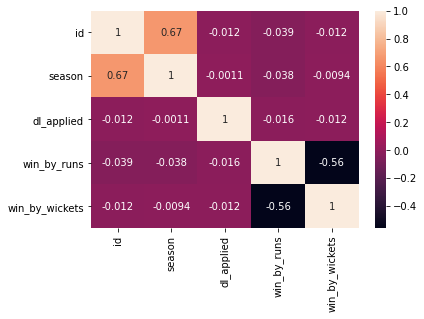

In [19]:
figure_1=matches.corr()
sns.heatmap(figure_1,annot=True)

## **First IPL Match -**

In [20]:
x= matches[matches.season==matches.season.min()]
x[['season','city','date','team1','team2','winner','win_by_runs','player_of_match']].head(1).style.background_gradient(cmap='rainbow')

,season,city,date,team1,team2,winner,win_by_runs,player_of_match
59,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,140,BB McCullum


## **Last IPL Match(2019) -**

In [21]:
x= matches[matches.season==matches.season.max()]
x[['season','city','date','team1','team2','winner','win_by_runs','player_of_match']].tail(1).style.background_gradient(cmap='icefire_r')

,season,city,date,team1,team2,winner,win_by_runs,player_of_match
755,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,1,JJ Bumrah


In [22]:
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

# **(I) Match Analysis -**

## **Number of Matches Played in each IPL Season -**

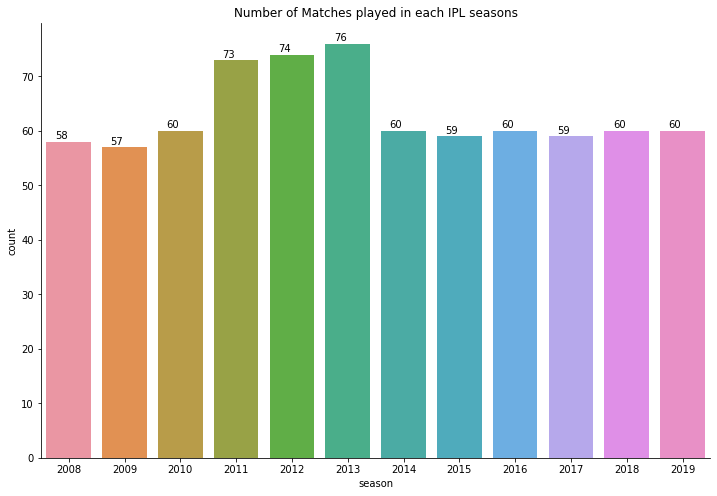

In [23]:
plt.figure(figsize=(12,8))
plt.title('Number of Matches played in each IPL seasons')
ax=sns.countplot(x=matches.season,)
annot_plot(ax,0.15,0.5)
plt.show()

*   **In 2013, maximum of 76 matches are played followed by 2012,2011.**
*   **Usually, number of matches are around 60.**


## **Top 10 Man of the Match -**

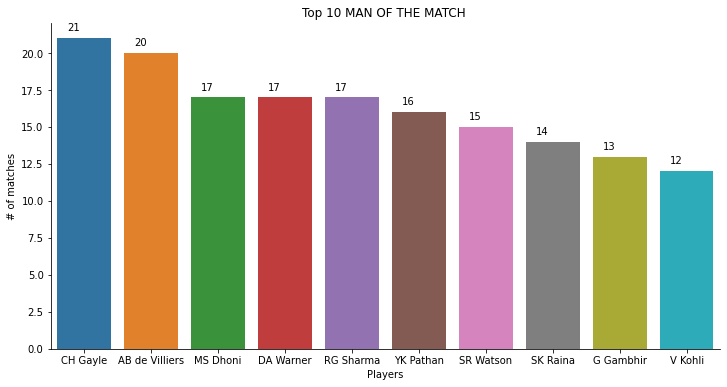

In [24]:
plt.figure(figsize=(12,6))
plt.title('Top 10 MAN OF THE MATCH ')
ax=sns.countplot(x=matches.player_of_match,order = matches.player_of_match.value_counts()[:10].index,)
ax.set_ylabel('# of matches')
ax.set_xlabel('Players')
annot_plot(ax,0.15,0.5)
plt.show()

*   **Chris Gayle is leading the pack followed by AB De Villiers**


## **Number of Matches Won by Each IPL Team -**

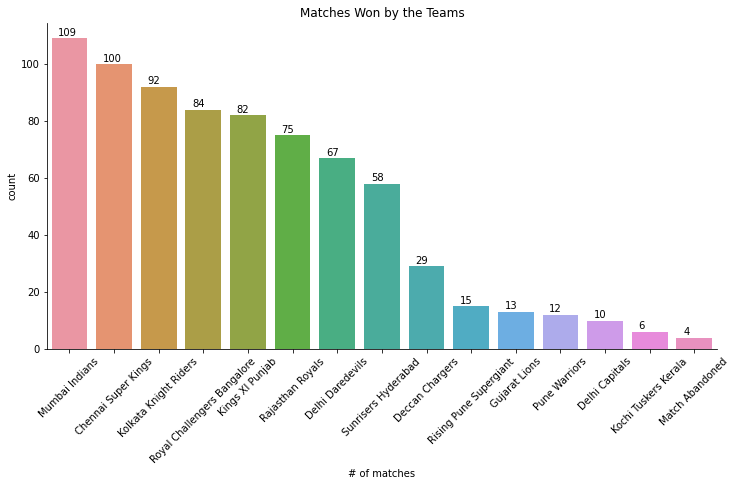

In [25]:
plt.figure(figsize=(12,6))
plt.title('Matches Won by the Teams')
ax=sns.countplot(x=matches['winner'],order = matches['winner'].value_counts().index)
ax.set_xlabel('# of matches')
plt.xticks(rotation=45)
annot_plot(ax,0.15,1)
plt.show()

*   **Mumbai Indians are the Winners of the Most Matches Followed by Chennai Super Kings**



## **Total Matches v/s Matches Won & Percentage of Matches Won -**

In [26]:
total_matches= pd.concat([matches.team1,matches.team2])
total_matches = total_matches.value_counts().reset_index()
total_matches.columns = ['Team','Total_Matches']
won_team = matches.winner.value_counts().reset_index()
won_team.columns = ['Team','Matches_won']
win_data= won_team[['Team','Matches_won']].merge(total_matches, left_on = 'Team', right_on = 'Team', how = 'right')
win_data['win_percent'] =  round((win_data.Matches_won/win_data['Total_Matches'])*100,1)

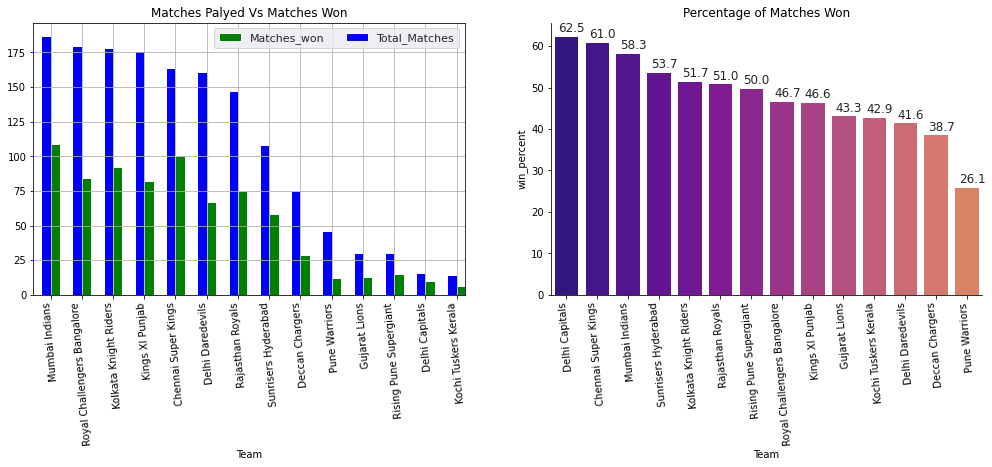

In [27]:
fig, ax =plt.subplots(1,2,figsize=(17,5))
sns.set()
df = win_data.set_index('Team')
width=0.3
df.Matches_won.plot(kind='bar',color='green',ax=ax[0],width=width, position=0)
df.Total_Matches.plot(kind='bar',color='blue',width = width,position=1,ax=ax[0])
ax[0].legend(ncol = 2, loc = 'Top right')
sns.barplot(y='win_percent',x='Team',data=win_data[['Team','win_percent']].sort_values(by='win_percent',ascending=False)
                 ,palette=sns.color_palette('plasma',20),ax=ax[1])
ax[0].tick_params('x', labelrotation=95)
ax[1].tick_params('x', labelrotation=95)
ax[0].set_title('Matches Palyed Vs Matches Won')
ax[1].set_title('Percentage of Matches Won')
annot_plot(ax[1],0.15,1)
plt.show()

*   **Out of total matches played, Delhi Capitals has the highest winning percentage, though Mumbai Indians played the most number of matches and also, won the most number of matches.**


## **Most Hosted Venues -**

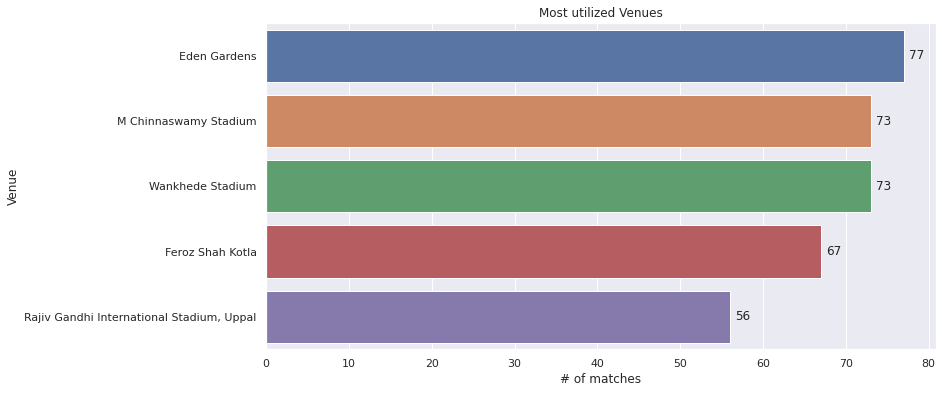

In [28]:
plt.figure(figsize=(12,6))
plt.title('Most utilized Venues')
ax=sns.countplot(y=matches['venue'],order = matches['venue'].value_counts()[0:5].index)
ax.set_xlabel('# of matches')
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_ylabel('Venue')
plt.show()

*   **Eden Garden be the most frequent stadium.**



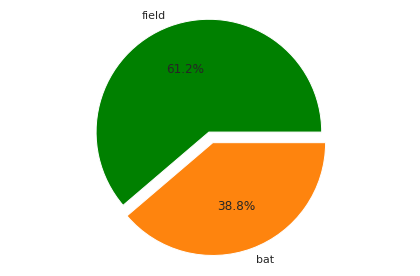

In [29]:
toss_decision=matches.toss_decision.value_counts(normalize=True)
colors=['green','#FE840E']
explode=(0.05,0.05)
plt.pie(toss_decision,labels=toss_decision.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

*   **Mostly, when a team wins the toss, the chances of choosing fielding is higher than batting.**
*   **We will check what will be the chances of winning after winning the toss.**

## **Toss Winning v/s Winning Chances -**

In [30]:
teams_toss = pd.concat([matches.team1,matches.team2])
teams_toss = teams_toss.value_counts().reset_index()
teams_toss.columns = ['Team','Total_Matches']
toss_won = matches.toss_winner.value_counts().reset_index()
toss_won.columns = ['Team','toss_won']
toss_data= toss_won[['Team','toss_won']].merge(teams_toss, left_on = 'Team', right_on = 'Team', how = 'right')
toss_data['toss_win_%'] =  round((toss_data.toss_won/toss_data['Total_Matches'])*100,2)
temp = matches[matches.toss_winner== matches.winner]
temp = temp.winner.value_counts().reset_index()
temp.columns=['Team','match_wins']
toss_data= temp[['Team','match_wins']].merge(toss_data, left_on = 'Team', right_on = 'Team', how = 'right')
toss_data['match_win_percent'] = round((toss_data.match_wins/toss_data['toss_won'])*100,1)

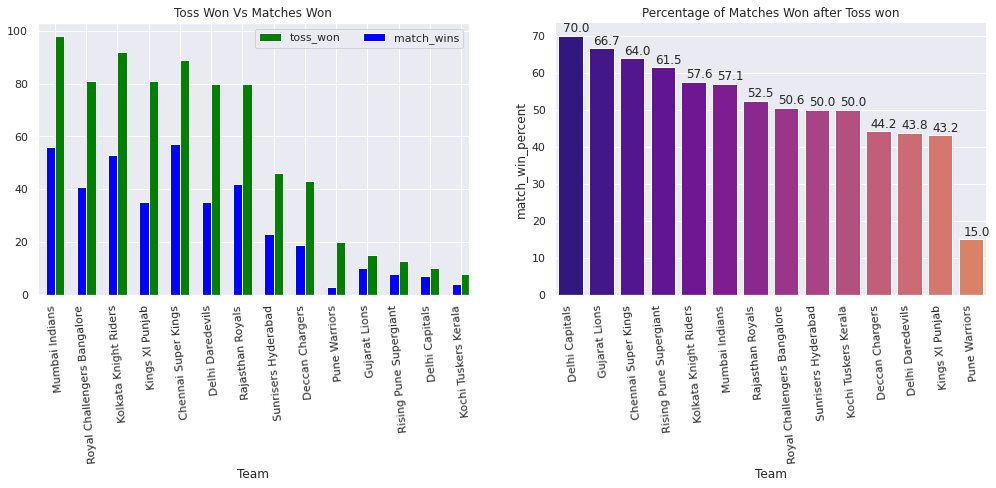

In [31]:
fig, ax =plt.subplots(1,2,figsize=(17,5))
sns.set()
df = toss_data.set_index('Team')
width=0.3
df.toss_won.plot(kind='bar',color='green',ax=ax[0],width=width, position=0)
df.match_wins.plot(kind='bar',color='blue',width = width,position=1,ax=ax[0])
ax[0].legend(ncol = 2, loc = 'Top right')
sns.barplot(y='match_win_percent',x='Team',data=toss_data[['Team','match_win_percent']].sort_values(by='match_win_percent',ascending=False)
                 ,palette=sns.color_palette('plasma',20),ax=ax[1])
ax[0].tick_params('x', labelrotation=95)
ax[1].tick_params('x', labelrotation=95)
ax[0].set_title('Toss Won Vs Matches Won')
ax[1].set_title('Percentage of Matches Won after Toss won')
annot_plot(ax[1],0.15,1)
plt.show()

*   **Mumbai Indians have won the most number of times but their chances of winning a match after winning the toss is 57.1% only.**

# **(II) RUN ANALYSIS -**

## **Delivery Metrics :**

In [32]:

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DCS','CSK','RR','DD','GL','KXIP','DC','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [33]:
wide_runs_team = deliveries.groupby('bowling_team')['bowling_team','wide_runs'].sum().sort_values('wide_runs',ascending=False)
wide_runs_team.reset_index(inplace=True)
bye_runs_team = deliveries.groupby('bowling_team')['bowling_team','bye_runs'].sum().sort_values('bye_runs',ascending=False)
bye_runs_team.reset_index(inplace=True)
legbye_runs_team = deliveries.groupby('bowling_team')['bowling_team','legbye_runs'].sum().sort_values('legbye_runs',ascending=False)
legbye_runs_team.reset_index(inplace=True)
noball_runs_team = deliveries.groupby('bowling_team')['bowling_team','noball_runs'].sum().sort_values('noball_runs',ascending=False)
noball_runs_team.reset_index(inplace=True)
extra_runs_team = deliveries.groupby('bowling_team')['bowling_team','extra_runs'].sum().sort_values('extra_runs',ascending=False)
extra_runs_team.reset_index(inplace=True)
wickets_runs_team=deliveries[deliveries['player_dismissed'] !=0].groupby('bowling_team')['player_dismissed'].count().sort_values(ascending=False).reset_index()
runs_by_batting_team = deliveries.groupby(by='batting_team')['batting_team','total_runs'].sum().sort_values('total_runs',ascending=False)
runs_by_batting_team.reset_index(inplace=True)
runs_by_bowling_team = deliveries.groupby(by='bowling_team')['bowling_team','total_runs'].sum().sort_values('total_runs',ascending=False)
runs_by_bowling_team.reset_index(inplace=True)

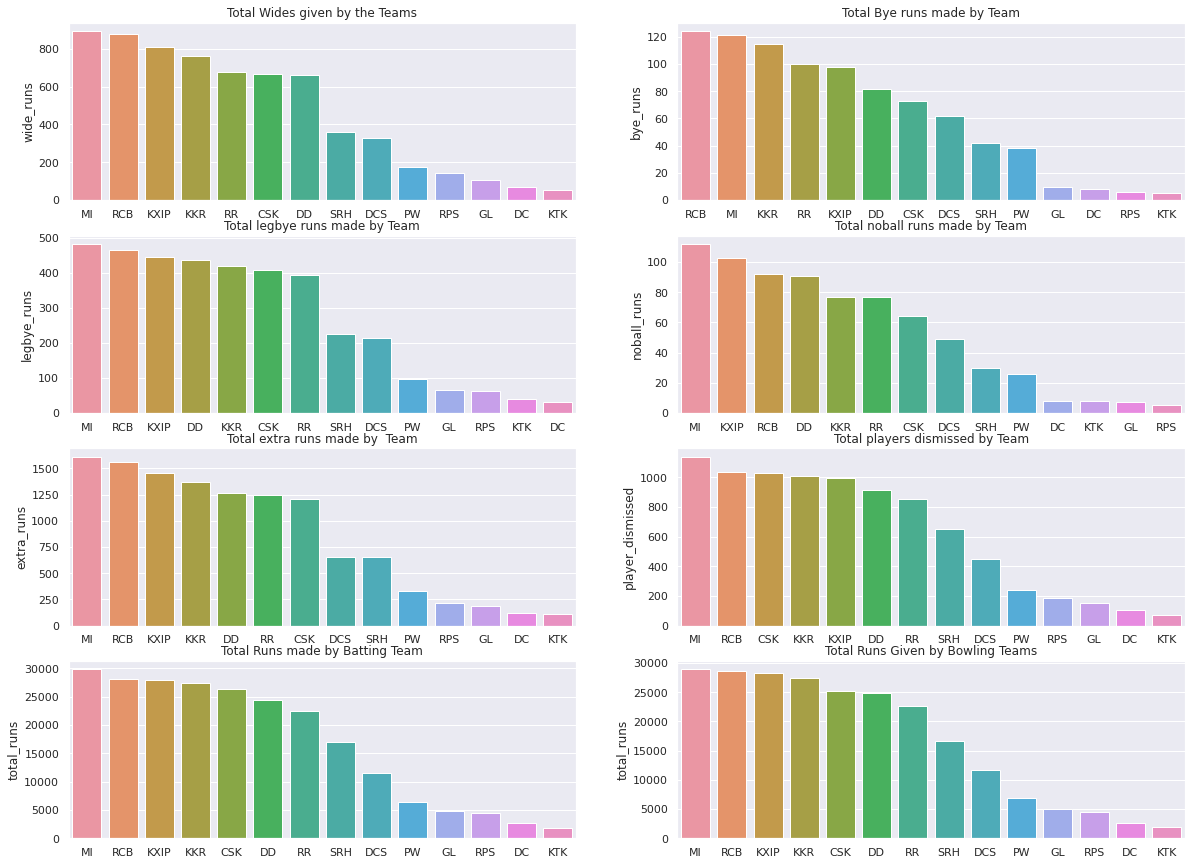

In [34]:
fig, ax =plt.subplots(4,2,figsize=(20,15))
sns.barplot(x='bowling_team', y='wide_runs', data = wide_runs_team,ax=ax[0][0]).set(xlabel=None)
ax[0][0].set_title('Total Wides given by the Teams')
sns.barplot(x='bowling_team', y='bye_runs', data = bye_runs_team,ax=ax[0][1]).set(xlabel=None)
ax[0][1].set_title('Total Bye runs made by Team')
sns.barplot(x='bowling_team', y='legbye_runs', data = legbye_runs_team,ax=ax[1][0]).set(xlabel=None)
ax[1][0].set_title('Total legbye runs made by Team')
sns.barplot(x='bowling_team', y='noball_runs', data = noball_runs_team,ax=ax[1][1]).set(xlabel=None)
ax[1][1].set_title('Total noball runs made by Team')
sns.barplot(x='bowling_team', y='extra_runs', data = extra_runs_team,ax=ax[2][0]).set(xlabel=None)
ax[2][0].set_title('Total extra runs made by  Team')
sns.barplot(x='bowling_team', y='player_dismissed', data = wickets_runs_team,ax=ax[2][1]).set(xlabel=None)
ax[2][1].set_title('Total players dismissed by Team')
sns.barplot(x='batting_team', y='total_runs', data = runs_by_batting_team,ax=ax[3][0]).set(xlabel=None)
ax[3][0].set_title('Total Runs made by Batting Team')
sns.barplot(x='bowling_team', y='total_runs', data = runs_by_bowling_team,ax=ax[3] [1]).set(xlabel=None)
ax[3][1].set_title('Total Runs Given by Bowling Teams')

plt.show()

## **Delivery Metrics in Matrix Format -**

In [35]:
delivery_metrics= matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
x = delivery_metrics.groupby('batting_team')['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs'].sum()
x.style.background_gradient(cmap='coolwarm')

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
batting_team,,,,,,,,
CSK,716,92,416,90,0,25104,1314,26418
DC,45,6,41,8,0,2530,100,2630
DCS,279,50,200,49,0,10885,578,11463
DD,716,83,391,73,10,23115,1273,24388
GL,134,8,74,17,0,4629,233,4862
KKR,852,117,469,86,0,25895,1524,27419
KTK,89,7,36,11,0,1758,143,1901
KXIP,728,150,483,64,0,26468,1425,27893
MI,948,97,510,90,0,28164,1645,29809


*   **Mumbai Indians has topped in most number of matches.**

## **Penalty Runs by the Teams -**

In [36]:
#penalty_by_team = deliveries.groupby('bowling_team')['bowling_team','penalty_runs'].sum().sort_values('penalty_runs',ascending=False).reset_index()
penalty = deliveries[deliveries.penalty_runs !=0]
penalty

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15476,66,2,DD,DCS,12,6,V Sehwag,S Dhawan,PP Ojha,0,0,0,0,0,5,0,5,5,0,0,0
112093,473,2,DD,MI,5,2,M Vijay,Q de Kock,SL Malinga,0,2,0,0,0,5,0,7,7,0,0,0


## **Dismissal Types -**

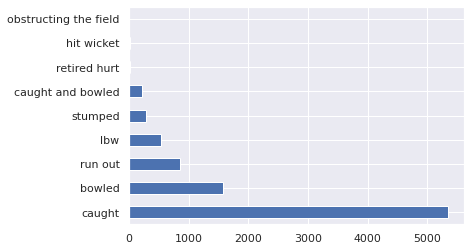

In [37]:
dismissal_types = deliveries[deliveries.dismissal_kind !=0]
dismissal_types['dismissal_kind'].value_counts().plot(kind='barh')
plt.show()

*   **Most type of dismissal is Caught and Bowled.**

## **Most Runs in the Seasons -**

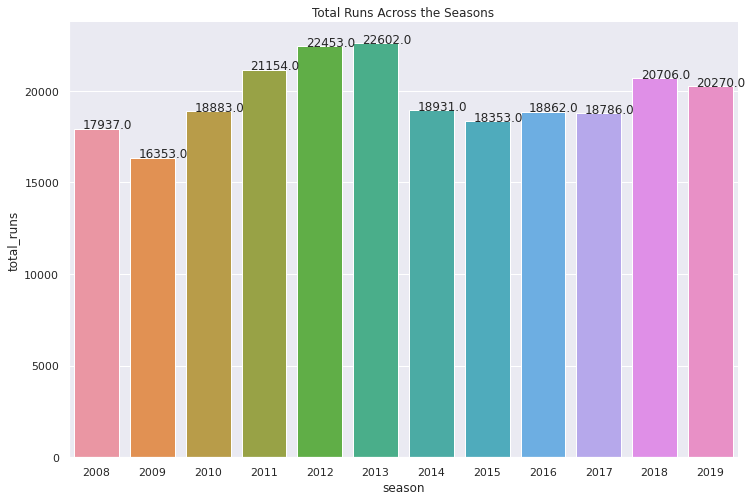

In [38]:
season_total_runs=delivery_metrics.groupby(['season'])['total_runs'].sum().reset_index()
plt.figure(figsize=(12,8))
ax=sns.barplot(x='season', y='total_runs',data=season_total_runs)
annot_plot(ax,0.15,1)
plt.title('Total Runs Across the Seasons')
plt.show()

*   **In 2013, the number of total runs is more as compared to 2012, 2011 or the pther years as there were more number of matches conducted than usual.**

## **Average Runs per Match Across the Seasons -**

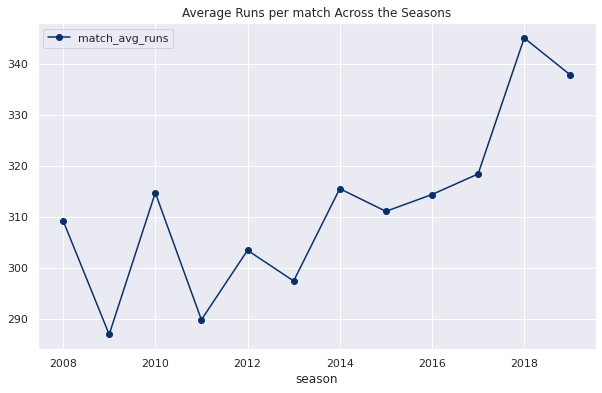

In [39]:
temp = delivery_metrics.groupby(['season','match_id'])['total_runs'].sum().reset_index()#.drop('match_id')
temp.columns = ['season','match_id','match_avg_runs']
temp = temp.groupby('season')['match_avg_runs'].mean().reset_index()
cm = plt.cm.get_cmap('hot')
temp.set_index('season').plot(marker='o',colormap='Blues_r')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match Across the Seasons')
plt.show()

*   **In 2018, the avaerage run per match was very high than usual.**

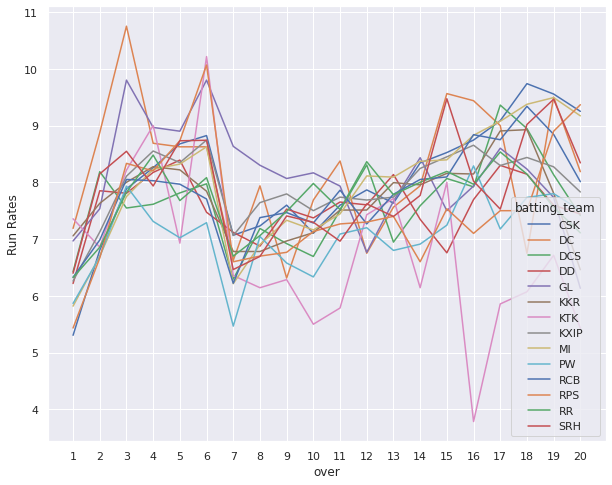

In [40]:
matches_team = delivery_metrics.groupby('batting_team')['match_id'].nunique().reset_index()
runperover = delivery_metrics.groupby(['batting_team','over'])['total_runs'].sum().reset_index()
runperover=runperover.merge(matches_team,left_on='batting_team',right_on='batting_team',how='outer')
runperover['run_rate'] = runperover.total_runs/runperover.match_id
run_per_over = runperover[['batting_team','over','run_rate']].set_index(['batting_team','over'])
r = run_per_over.unstack(level=0)
team = matches_team.batting_team
r.run_rate[team].plot() #plotting graphs for teams that have played more than 100 matches
x=r.index
plt.xticks(x)
plt.ylabel('Run Rates')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

*   **The run rate at the starting overs like the 2nd and 3rd overs was usually higher and goes on decreasing trend till 20 overs.**

## **Top Wicket Taker -**

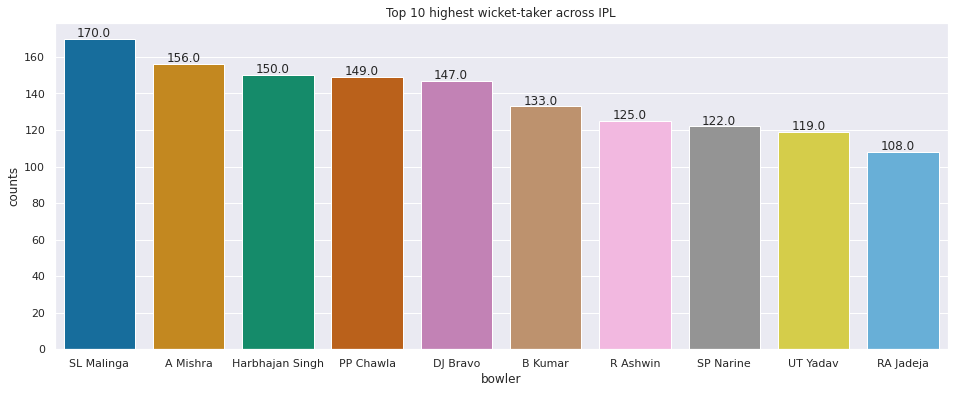

In [42]:
high_wickettaker_all = delivery_metrics[delivery_metrics.player_dismissed != 0]
high_wickettaker_all = high_wickettaker_all[(high_wickettaker_all.dismissal_kind !='retired hurt') & (high_wickettaker_all.dismissal_kind !='obstructing the field'
) & (high_wickettaker_all.dismissal_kind !='run out') ]
high_wickettaker = high_wickettaker_all.bowler.value_counts().reset_index()
high_wickettaker = pd.DataFrame(high_wickettaker)
high_wickettaker.columns = ['bowler','counts']
high_wickettaker = high_wickettaker.sort_values(by='counts',ascending=False)
plt.subplots(figsize=(16,6))
plt.title('Top 10 highest wicket-taker across IPL')
ax = sns.barplot(y='counts',x='bowler',data=high_wickettaker[:10],palette=sns.color_palette('colorblind',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **S.L. Malinga was the highest wicket taker from 2008 to 2018 with 170 wickets in total.**

## **Purple Cap :**

['Imran Tahir'] won the PURPLE CAP in IPL-  2019


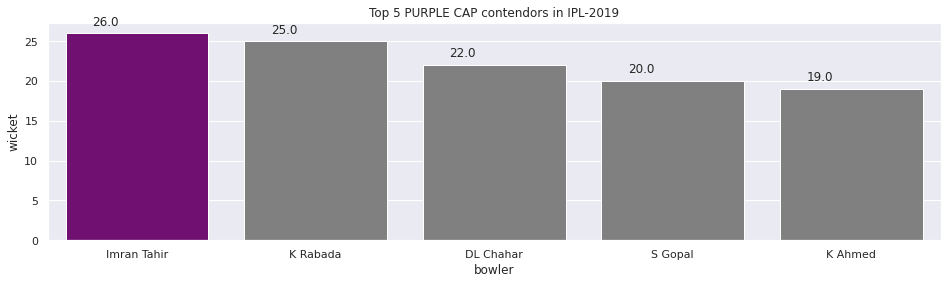

In [43]:
def purple_cap(season):
        purple_cap = high_wickettaker_all[high_wickettaker_all.season==season]
        purple_cap = purple_cap.bowler.value_counts().reset_index()
        purple_cap.columns = ['bowler','wicket']
      #purple_cap.head(5)
        plt.subplots(figsize=(16,4))
        plt.title('Top 5 PURPLE CAP contendors in IPL-'+str(season))
        values = purple_cap.wicket[:5]
        print(str(list(purple_cap.bowler[:1]))+' won the PURPLE CAP in IPL- ',str(season))
        clrs = ['grey' if (x < max(values)) else 'purple' for x in values ]
        ax=sns.barplot(x='bowler', y='wicket',data=purple_cap[:5], palette=clrs) # color=clrs)
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
        plt.show()
purple_cap(2019)

*   **If we check for the year 2019, Imran Tahir is the holder of the Purple Cap.**

## **Most Runs by Batsman -**

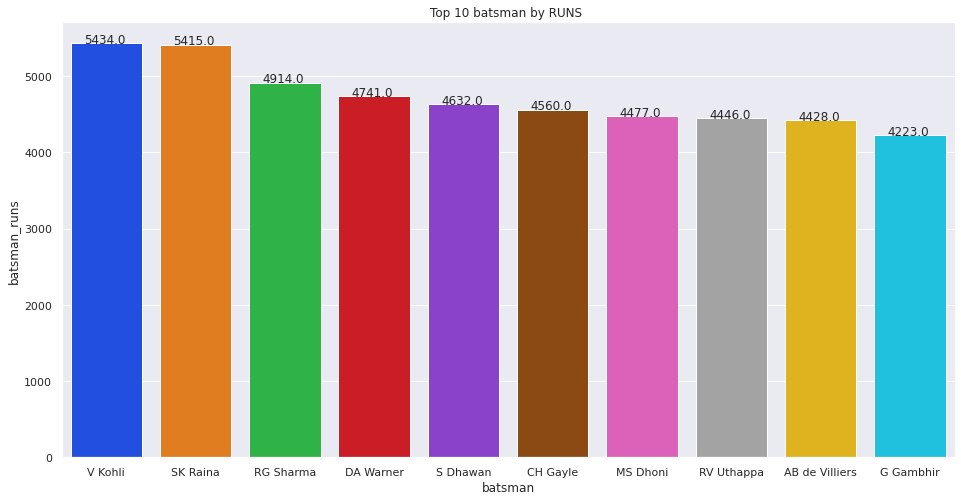

In [44]:
highest_run_scorer = delivery_metrics.groupby('batsman')['batsman_runs'].sum().reset_index()
highest_run_scorer = highest_run_scorer.sort_values('batsman_runs',ascending=False)

plt.subplots(figsize=(16,8))
plt.title('Top 10 batsman by RUNS ')
ax = sns.barplot(y='batsman_runs',x='batsman',data=highest_run_scorer[:10],palette=sns.color_palette('bright',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **V. Kohli has scored the top score followed by S.K. Raina and R.G. Sharma.**

## **Orange Cap :**

['DA Warner'] won the ORANGE CAP in IPL-  2019


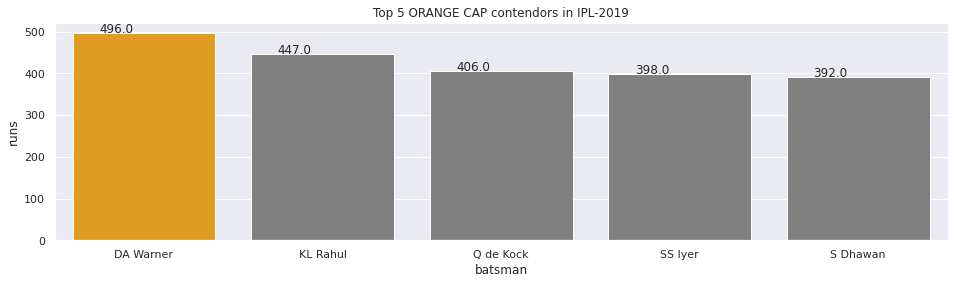

In [45]:
def orange_cap(season):
    orange_cap = delivery_metrics[delivery_metrics.season==season]
    orange_cap = orange_cap.batsman.value_counts().reset_index()
    orange_cap.columns = ['batsman','runs']
    #print(orange_cap.head(5))
    plt.subplots(figsize=(16,4))
    plt.title('Top 5 ORANGE CAP contendors in IPL-'+str(season))
    values = orange_cap.runs[:5]
    print(str(str(orange_cap.batsman[:1].values))+' won the ORANGE CAP in IPL- ',season)
    clrs = ['grey' if (x < max(values)) else 'Orange' for x in values ]
    ax=sns.barplot(x='batsman', y='runs',data=orange_cap[:5], palette=clrs) # color=clrs)
    for p in ax.patches:
          ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    plt.show()
orange_cap(2019)

*   **In 2019, the Orange Cap winner is D.A. Warner.**

## **Batsman Metrics :**

In [46]:
innings = deliveries.groupby('batsman')['match_id'].nunique().reset_index()
bat=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
bat = innings.merge(bat,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(runs,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'match_id':'Innings','ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
bat['strike_rate']=np.round(bat['ball_y']/bat['ball_x']*100,2)
bat['bat_average'] = np.round((bat.ball_y/bat.Innings),2)
bat=bat.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman'])['batsman_runs'].max().reset_index()
bat=bat.merge(compare,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batsman_runs':'Highest_score'},axis=1,inplace=True)
batsman=bat[1:].sort_values('runs',ascending=False).head(10)
batsman.style.background_gradient(cmap="YlGn")

,batsman,Innings,balls,runs,strike_rate,bat_average,6's,4's,Highest_score
486,V Kohli,169,4211,5434,129.040000,32.150000,482,191,113
428,SK Raina,189,4044,5415,133.900000,28.650000,495,195,100
367,RG Sharma,182,3816,4914,128.770000,27.000000,431,194,109
112,DA Warner,126,3398,4741,139.520000,37.630000,459,181,126
392,S Dhawan,158,3776,4632,122.670000,29.320000,526,96,98
92,CH Gayle,124,3131,4560,145.640000,36.770000,376,327,175
290,MS Dhoni,170,3318,4477,134.930000,26.340000,297,207,89
384,RV Uthappa,170,3492,4446,127.320000,26.150000,436,156,87
26,AB de Villiers,142,2977,4428,148.740000,31.180000,357,214,133
147,G Gambhir,151,3524,4223,119.840000,27.970000,492,59,93


## **Most Runs by Batsman in IPL -**

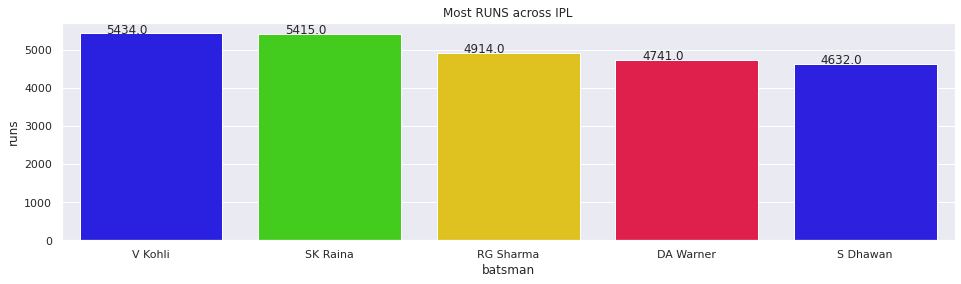

In [47]:
plt.subplots(figsize=(16,4))
plt.title("Most RUNS across IPL")
batsman = batsman.sort_values("runs",ascending=False)
ax = sns.barplot(y="runs",x='batsman',data=batsman[:5],palette=sns.color_palette('prism',5))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

## **Most Sixes by Batsman in IPL -**

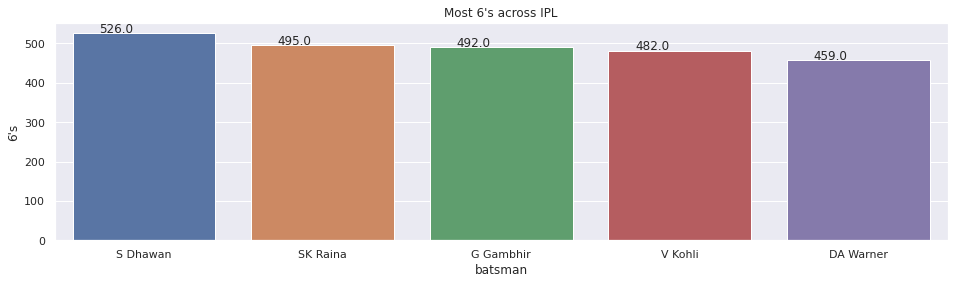

In [48]:
plt.subplots(figsize=(16,4))
plt.title("Most 6's across IPL")
batsman = batsman.sort_values("6's",ascending=False)
ax = sns.barplot(y="6's",x='batsman',data=batsman[:5])
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **S. Dhawan is leading the pack by a considerable margin.**

## **Most Fours by Batsman in IPL -**

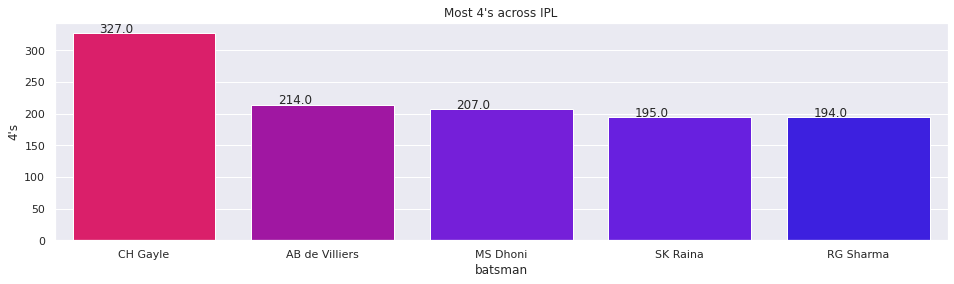

In [49]:
plt.subplots(figsize=(16,4))
plt.title("Most 4's across IPL")
batsman = batsman.sort_values("4's",ascending=False)
ax = sns.barplot(y="4's",x='batsman',data=batsman[:5],palette=sns.color_palette('prism',10))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **C.H. Gayle has the highest number of fours in all the IPL matches.**

## **Most Run-outs Faced by Any Batsman in IPL -**

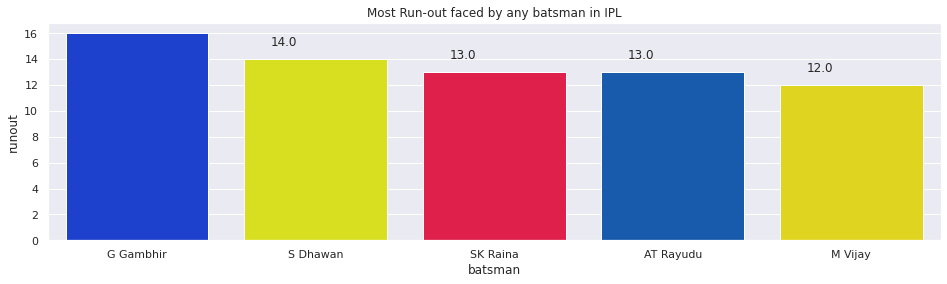

In [50]:
bat_runouts = deliveries[deliveries.dismissal_kind=='run out']
bat_runouts = bat_runouts.groupby('player_dismissed')['dismissal_kind'].count().reset_index()
bat_runouts.columns = ['batsman','runout']
bat_runouts = bat_runouts.sort_values('runout',ascending=False)
plt.subplots(figsize=(16,4))
plt.title('Most Run-out faced by any batsman in IPL')
ax = sns.barplot(y='runout',x='batsman',data=bat_runouts[:5],palette=sns.color_palette('prism',15))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **G. Gambhir has faced the most of his outs through run-outs followed by S. Dhawan.**

## **Bowler Metrics :**

In [51]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
bbm = ct.groupby(['match_id','bowler'])['player_dismissed'].count().reset_index()
bbm = bbm.sort_values('player_dismissed',ascending=True)
#bbm
bowl_over = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index()
bowl_over = bowl_over.sort_values('total_runs',ascending=False)
bowl_wicket_over = bbm.merge(bowl_over,left_on=['match_id','bowler'],right_on=['match_id','bowler'],how='outer')
bf = bowl_wicket_over.groupby(['bowler']).max().reset_index()
bf = bf[['bowler','player_dismissed','total_runs']]

bf['player_dismissed']=bf['player_dismissed'].fillna(0)
bf['player_dismissed']=bf['player_dismissed'].astype(int)
bf['bbm'] = bf[['player_dismissed', 'total_runs']].astype(str).apply(lambda x: ' / '.join(x), axis=1)
bf.replace('NaN', np.NaN)
bfs = bf[['bowler','bbm']]
four_wicket=bowl_wicket_over.groupby('bowler')['player_dismissed'].agg(lambda x: (x==4).sum()).reset_index()
four_wicket.columns = ['bowler','4W']
fifer = bowl_wicket_over.groupby('bowler')['player_dismissed'].agg(lambda x: (x>4).sum()).reset_index()
fifer.columns = ['bowler','5W']

In [52]:
innings = deliveries.groupby('bowler')['match_id'].nunique().reset_index()
balls=deliveries.groupby(['bowler'])['ball'].count().reset_index()
runs=deliveries.groupby(['bowler'])['total_runs'].sum().reset_index()
balls = innings.merge(balls,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(runs,left_on='bowler',right_on='bowler',how='outer')
balls.rename({'match_id':'Innings','ball':'ball_x','total_runs':'runs_given'},axis=1,inplace=True)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
wickets = ct.groupby('bowler')['player_dismissed'].count().reset_index()
balls=balls.merge(wickets,left_on='bowler',right_on='bowler',how='outer')
balls['strike_rate']=np.round((balls.ball_x/balls.player_dismissed),2)
balls['average'] = np.round((balls.runs_given/balls.player_dismissed),2)
balls['economy']=np.round(balls['runs_given']/(balls['ball_x']/6),2)
balls=balls.merge(bfs,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(four_wicket,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(fifer,left_on='bowler',right_on='bowler',how='outer')
balls[['player_dismissed','strike_rate','average','4W','5W']]=balls[['player_dismissed','strike_rate','average','4W','5W']].fillna(0)
balls[['player_dismissed','4W','5W']]=balls[['player_dismissed','4W','5W']].astype(int)
balls.rename({'ball_x':'balls','player_dismissed':'wickets'},axis=1,inplace=True)
balls = balls.sort_values('wickets',ascending=False)
bowler=balls.head(10)
bowler.style.background_gradient(cmap='PRGn')

,bowler,Innings,balls,runs_given,wickets,strike_rate,average,economy,bbm,4W,5W
340,SL Malinga,122,2974,3511,170,17.490000,20.650000,7.080000,5 / 58,6,1
7,A Mishra,147,3172,3850,156,20.330000,24.680000,7.280000,5 / 56,3,1
126,Harbhajan Singh,157,3451,4050,150,23.010000,27.000000,7.040000,5 / 60,1,1
264,PP Chawla,156,3157,4153,149,21.190000,27.870000,7.890000,4 / 67,2,0
93,DJ Bravo,131,2711,3733,147,18.440000,25.390000,8.260000,4 / 56,2,0
53,B Kumar,117,2707,3264,133,20.350000,24.540000,7.230000,5 / 58,2,1
269,R Ashwin,136,3016,3391,125,24.130000,27.130000,6.750000,4 / 58,1,0
347,SP Narine,109,2600,2939,122,21.310000,24.090000,6.780000,5 / 48,6,1
381,UT Yadav,118,2605,3640,119,21.890000,30.590000,8.380000,4 / 65,2,0
282,RA Jadeja,142,2541,3221,108,23.530000,29.820000,7.610000,5 / 57,3,1


## **Top Wicket Takers in IPL -**

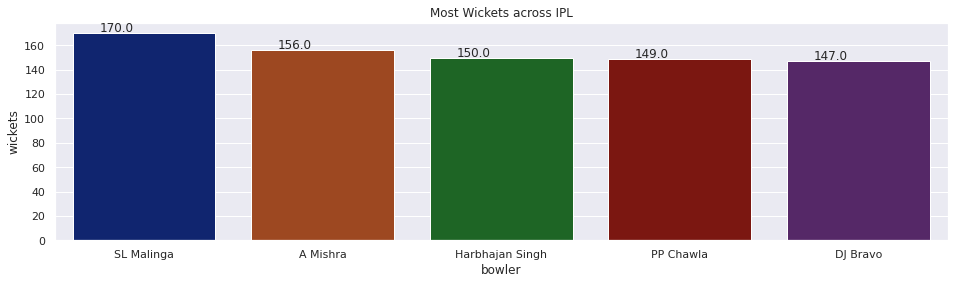

In [53]:
plt.subplots(figsize=(16,4))
plt.title("Most Wickets across IPL")
ax = sns.barplot(y="wickets",x='bowler',data=bowler[:5],palette=sns.color_palette('dark',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **S.L. Malinga has taken 170 wickets all together from 2008-2019 IPL Matches.**

## **Most Catches Across IPL -**

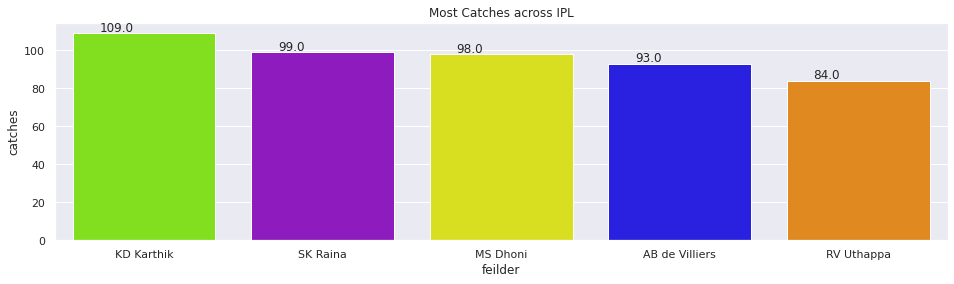

In [54]:
caught = deliveries[deliveries.dismissal_kind=='caught']
caught = caught.groupby('fielder')['bowler'].count().reset_index()
caught.columns = ['feilder','catches']
caught = caught.sort_values('catches',ascending=False)
plt.subplots(figsize=(16,4))
plt.title('Most Catches across IPL')
ax = sns.barplot(y='catches',x='feilder',data=caught[:5],palette=sns.color_palette('prism',23))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **K.D. Karthik has taken most of the wickets by 109 catches followed by S.K. Raina.**

## **Most Run-outs by Fielders Across IPL -**

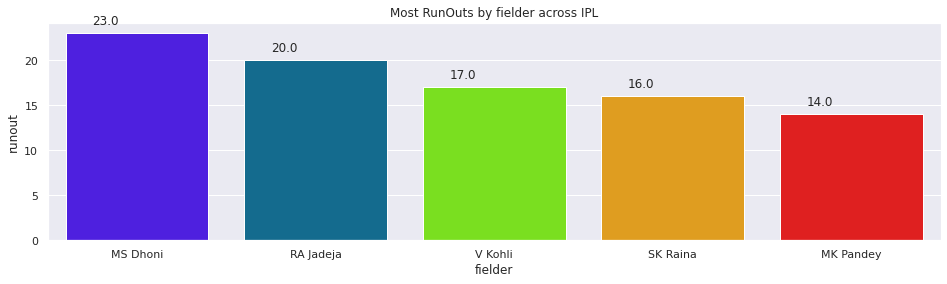

In [55]:
runouts = deliveries[deliveries.dismissal_kind=='run out']
runouts = runouts.groupby('fielder')['dismissal_kind'].count().reset_index()
runouts.columns = ['fielder','runout']
runouts = runouts.sort_values('runout',ascending=False)
plt.subplots(figsize=(16,4))
plt.title('Most RunOuts by fielder across IPL')
ax = sns.barplot(y='runout',x='fielder',data=runouts[:5],palette=sns.color_palette('prism',12))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

*   **M.S. Dhoni has taken 23 wickets through run-out the batsmen.**

# **Observations -**
*   **The information depicted above is of the 9 seasons of IPL and a clear trend can be seen for the match winning combination of the team members and the batting strengths.**
*   **It was seen that Mumbai Indians played the m ost number of matches.**
*   **Virat Kohli was the best batsman and has scored against some of the best bowlers.**
*   **The information shown above for the opponents of Delhi Daredevils(later on, as Delhi Capitals) would include the bowlers against whom Virat Kohli performed poorly.**
*   **The top batsmen have been consistent in their performance.**
*   **Mumbai Indians required more games for each win while teams like CSK needed less to win.**

## **IPL 2020 then takes the stage : 'Yaha sab same hain, haa yeh apna game hain!'**